# Controle de Questões
## Importanto as bibliotecas

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Ler os dados

In [28]:
data = pd.read_excel('data/Questions_Control.xlsx')
data

,Disciplina,Assunto,Total Questões,Acertos,Erros,Data Realização
0,Ciência de Dados,Aprendizado de Máquina,0,0,0,2024-03-12
1,Português,Gêneros Textuais,0,0,0,2024-03-12
2,Noções de Lógica e Estátistica,Estátistica Descritiva,0,0,0,2024-03-12
3,Direito Administrativo,Princípios Administrativos,0,0,0,2024-03-12
4,Macro e Micro economia,Introdução à Economia,0,0,0,2024-03-12
5,Segurança da Informação,Sistemas de Proteção,0,0,0,2024-03-12
6,Engenharia de Software,DevOps e DevSecOps,0,0,0,2024-03-12
7,Infraestrutura em TI,Computação em Nuvem,0,0,0,2024-03-12
8,Bancos de Dados,Modelagem de Dados,0,0,0,2024-03-12
9,Gestão em TI,Scrum e Kaban,0,0,0,2024-03-12


In [29]:
# Data set de teste

dados = {
    'Disciplina': [
        'Ciência de Dados', 'Ciência de Dados', 'Ciência de Dados',
        'Português', 'Português', 'Português',
        'Noções de Lógica e Estatística', 'Noções de Lógica e Estatística', 'Noções de Lógica e Estatística',
        'Direito Administrativo', 'Direito Administrativo', 'Direito Administrativo'
    ],
    'Assunto': [
        'Machine Learning', 'Big Data', 'Algoritmos',
        'Gramática', 'Redação', 'Literatura',
        'Probabilidade', 'Estatística Descritiva', 'Análise de Regressão',
        'Constitucional', 'Administrativo', 'Tributário'
    ],
    'Total Questões': [10, 15, 20, 20, 15, 10, 15, 10, 20, 15, 10, 20],
    'Acertos': [7, 10, 15, 15, 8, 5, 10, 8, 17, 11, 7, 14],
    'Erros': [3, 5, 5, 5, 7, 5, 5, 2, 3, 4, 3, 6],
    'Data Realização': [
        '2024-01-05', '2024-01-08', '2024-01-11',
        '2024-01-06', '2024-01-09', '2024-01-12',
        '2024-01-07', '2024-01-10', '2024-01-13',
        '2024-01-08', '2024-01-11', '2024-01-14'
    ]
}

pd.DataFrame(dados)

,Disciplina,Assunto,Total Questões,Acertos,Erros,Data Realização
0,Ciência de Dados,Machine Learning,10,7,3,2024-01-05
1,Ciência de Dados,Big Data,15,10,5,2024-01-08
2,Ciência de Dados,Algoritmos,20,15,5,2024-01-11
3,Português,Gramática,20,15,5,2024-01-06
4,Português,Redação,15,8,7,2024-01-09
5,Português,Literatura,10,5,5,2024-01-12
6,Noções de Lógica e Estatística,Probabilidade,15,10,5,2024-01-07
7,Noções de Lógica e Estatística,Estatística Descritiva,10,8,2,2024-01-10
8,Noções de Lógica e Estatística,Análise de Regressão,20,17,3,2024-01-13
9,Direito Administrativo,Constitucional,15,11,4,2024-01-08


## Métodos

In [30]:
# Gráfico de barra para mostrar a quantidade de acerto em cada assunto
def GraphBarHitQuantitySubject(discipline):
	discipline_data = data[data['Disciplina'] == discipline]

	# figure
	plt.figure(figsize=(20,10))
	plt.barh(discipline_data['Assunto'], discipline_data['Acertos'], color='g', align='center')
	plt.title('Quantidade de Acertos por Assunto')
	plt.ylabel('Assuntos')
	plt.xlabel('Acertos')
	plt.xlim(0, discipline_data['Total Questões'].max())
	plt.grid(axis='x', linestyle='--', alpha=0.5)
	plt.show()

# Gráfico de barra para mostrar a porcentagem de acerto em cada assunto
def GraphBarHitPorcentSubject(discipline):
	# pegando apenas os assuntos daquela disciplina
	discipline_data = data[data['Disciplina'] == discipline]
	# agrupando os valores repetidos
	grouped_subjects = discipline_data.groupby('Assunto').agg({'Total Questões': 'sum', 'Acertos': 'sum'}).reset_index()
	# calculando a porcentagem de acerto
	grouped_subjects['Porcentagem de Acerto'] = (grouped_subjects['Acertos'] / grouped_subjects['Total Questões']) * 100

	# figure
	plt.figure(figsize=(20,7))
	plt.barh(grouped_subjects['Assunto'], grouped_subjects['Porcentagem de Acerto'], color='g', align='center')
	plt.title('Porcentagem de acerto em {}'.format(discipline))
	plt.ylabel('Assuntos')
	plt.xlabel('Porcetagem de acerto %')
	plt.xlim(0, 100)
	plt.grid(axis='x', linestyle='--', alpha=0.5)
	plt.show()

# Gráfico de porcentagem de acerto ao longo do tempo
def PlotHitPorcentByTime(discipline):
	# pegando apenas os assuntos daquela disciplina
	discipline_data = data[data['Disciplina'] == discipline]
	# agrupando as datas repetidadas
	grouped_subjects = discipline_data.groupby('Data Realização').agg({'Total Questões': 'sum', 'Acertos': 'sum'}).reset_index()

	grouped_subjects['Porcentagem de Acerto'] = (grouped_subjects['Acertos'] / grouped_subjects['Total Questões']) * 100
	grouped_subjects = grouped_subjects.replace(np.nan, 0)

	plt.figure(figsize=(20,7))
	plt.ylim(0, 100)	
	plt.plot(grouped_subjects['Data Realização'], grouped_subjects['Porcentagem de Acerto'], lw=2, c='b', linestyle="--")
	plt.grid(axis='x', linestyle='--', alpha=0.5)

	plt.show()

# Gráfico que mostra a porcentagem de acerto em cada disciplina ao longo do tempo
def PlotHitPorcentDisciplinesByTime():
	df = pd.DataFrame(data)
	df['Porcentagem de Acerto'] = (df['Acertos'] / df['Total Questões']) * 100

	# Agrupar por disciplina
	grouped = df.groupby('Disciplina')
	
	# Plotar o gráfico para cada disciplina
	plt.figure(figsize=(12, 6))
	for name, group in grouped:
		plt.plot(group['Data Realização'], group['Porcentagem de Acerto'], marker='o', label=name)

	plt.title('Porcentagem de Acerto ao Longo do Tempo')
	plt.xlabel('Data Realização')
	plt.ylabel('Porcentagem de Acerto')
	plt.xticks(rotation=45)
	plt.legend()
	plt.grid(True)
	plt.tight_layout()
	plt.show()


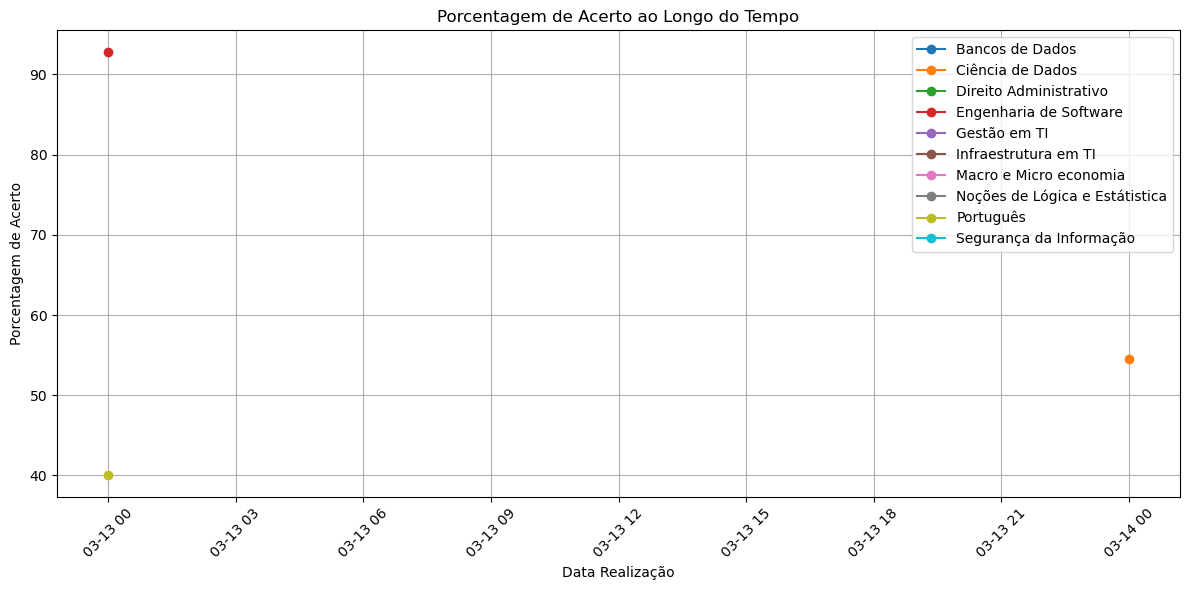

In [31]:
PlotHitPorcentDisciplinesByTime()